# 1. Step: Import of required libraries

In this step all the libraries needed within the script are imported

In [1]:
import sys
import logging
import xlrd, xlsxwriter
import numpy as np
import pandas as pd
import time
import datetime
import scipy.io
import scipy

# 2. Step: Locating the Database Address

The database address is defined in this step.

In [2]:
ProjectSpecs_Path_Main     = 'C:/Users/ghardadi/Documents/'
ProjectSpecs_Name_ConFile  = 'MRIO_Config.xlsx'
ProjectSpecs_DataPath1     = 'C:/Users/ghardadi/EXIOBASE_2/'
ProjectSpecs_PackagePath1  = 'C:/Users/ghardadi/'

sys.path.append(ProjectSpecs_PackagePath1)

# 3. Step: Extracting the Information from Config File

In this step we collect the information from config file and start the simulation.

In [3]:
# Load project-specific config file
Project_Configfile  = xlrd.open_workbook(ProjectSpecs_Path_Main + 'Calculation/' + ProjectSpecs_Name_ConFile)
Project_Configsheet = Project_Configfile.sheet_by_name('Config')

# Naming script and defining of name specifications (e.g. date when the script was used)
Name_Script        = Project_Configsheet.cell_value(6,3)
Name_Scenario      = Project_Configsheet.cell_value(5,3)
StartTime          = datetime.datetime.now()
TimeString         = str(StartTime.year) + '_' + str(StartTime.month) + '_' + str(StartTime.day) + '__' + str(StartTime.hour) + '_' + str(StartTime.minute) + '_' + str(StartTime.second)
DateString         = str(StartTime.year) + '_' + str(StartTime.month) + '_' + str(StartTime.day)
Path_Result        = ProjectSpecs_Path_Main + 'Results/'

# Importing information about Exiobase 2.2 from excel file
EB3_NoofCountries  = int(Project_Configsheet.cell_value(4,8))
EB3_NoofProducts   = int(Project_Configsheet.cell_value(5,8))
EB3_NoofIndustries = int(Project_Configsheet.cell_value(6,8))
EB3_NoofIOSectors  = int(Project_Configsheet.cell_value(7,8))
EB3_NoofFDCategories = int(Project_Configsheet.cell_value(8,8))

# Start the timer
Time_Start = time.time()
print('Start of simulation: ' + time.asctime() + '.')

Start of simulation: Mon Feb  3 11:47:52 2020.


# 4. Step: Import Exiobase 3.6

Now, Exiobase 3.6 will be imported. This includes the following:

L-Matrix containing the Leontief-Inverse

S-Matrix containing the emissions

Y-Matrix containing the final demands

FDE-Matrix containing the direct emissions caused by the final demands

In [4]:
print('Loading Exiobase 3.6 data.')

MRIO_Name = 'EXIOBASE3_13_Mon_49R_2018_06_01_ITCpxp.mat'

Filestring_Matlab_in = ProjectSpecs_DataPath1 + MRIO_Name

print('Import L-Matrix (Leontief-Inverse)')
MRIO_L = scipy.io.loadmat(Filestring_Matlab_in)['EB3_L_ITC']

print('Import S-Matrix (Emissions).')
MRIO_S = scipy.io.loadmat(Filestring_Matlab_in)['EB3_S_ITC']

print('Import Y-Matrix (Final Demands)')
MRIO_Y = scipy.io.loadmat(Filestring_Matlab_in)['EB3_Y']

print('Import FDE-Matrix (Direct Emissions from Final Demand).')
MRIO_FDE = scipy.io.loadmat(Filestring_Matlab_in)['EB3_FinalDemand_Emissions']

print('Import the Names of Industry Sectors.')
MRIO_Prod = scipy.io.loadmat(Filestring_Matlab_in)['EB3_ProductNames200']

print('Import the Names of Extension Codes.')
MRIO_Ext = scipy.io.loadmat(Filestring_Matlab_in)['EB3_Extensions']

print('Import the Names of Regions.')
MRIO_Reg = scipy.io.loadmat(Filestring_Matlab_in)['EB3_RegionList']

Loading Exiobase 3.6 data.
Import L-Matrix (Leontief-Inverse)
Import S-Matrix (Emissions).
Import Y-Matrix (Final Demands)
Import FDE-Matrix (Direct Emissions from Final Demand).
Import the Names of Industry Sectors.
Import the Names of Extension Codes.
Import the Names of Regions.


### Importing population data

In [5]:
Region_Datasheet = Project_Configfile.sheet_by_name('EXIOBASE 3 countries')

Region_Names = []
for m in range(0,49):
    Region_Names.append(Region_Datasheet.cell_value(m+4,5))
    
Population = []
for m in range(0,49):
    Population.append(int(Region_Datasheet.cell_value(m+4,12)))

print(Region_Names)
print()
print(Population)

['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark', 'Estonia', 'Spain', 'Finland', 'France', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden', 'Slovenia', 'Slovakia', 'United Kingdom', 'United States', 'Japan', 'China', 'Canada', 'South Korea', 'Brazil', 'India', 'Mexico', 'Russia', 'Australia', 'Switzerland', 'Turkey', 'Taiwan', 'Norway', 'Indonesia', 'South Africa', 'RoW Asia and Pacific', 'RoW America', 'RoW Europe', 'RoW Africa', 'RoW Middle East']

[8479823, 11159407, 7265115, 1143866, 10334160, 80645605, 5461438, 1317997, 46620045, 5288720, 65998687, 10965211, 4255689, 9893082, 4623816, 60233948, 2957689, 543360, 2012647, 425967, 16804432, 38040196, 10457295, 19983693, 9600379, 2059953, 5413393, 64128226, 316057727, 127445000, 1357380000, 35082954, 50428893, 201035903, 1280846129, 118827161, 143506911, 23128129, 8089346, 75928564, 23374000, 50

In [6]:
pd.DataFrame(Region_Names, columns=["Region"])

,Region
0,Austria
1,Belgium
2,Bulgaria
3,Cyprus
4,Czech Republic
5,Germany
6,Denmark
7,Estonia
8,Spain
9,Finland


# 5. Step: Import characterisation factors

In order to calculate the environmental footprints, characterisation factors are needed
to convert the emissions received by S. L. Y to midpoint indicators

In [14]:
ImpactFile  = xlrd.open_workbook(ProjectSpecs_DataPath1 + 'Characterization_EB36.xlsx')
ImpactSheet = ImpactFile.sheet_by_name('Emissions')
ImpactCategory_Names = []
for m in range(0,36):
    ImpactCategory_Names.append(ImpactSheet.cell_value(0,m+1))
    
MRIO_Char = np.zeros((36,1707))
for m in range(0,36):
    for n in range(0,1707):
        MRIO_Char[m,n] = ImpactSheet.cell_value(n+1,m+1)

print(ImpactCategory_Names)

['CO2 - GWP100                               ', 'CH4 - GWP100                               ', 'N2O - GWP100                               ', 'SF6 - GWP100                               ', 'Global Warming Potential 100               ', 'Land use - crops                           ', 'Land use - pasture                         ', 'Land use - forest                          ', 'Land use                                   ', 'Total Emission relevant energy use         ', 'Total Energy inputs from nature            ', 'Total Energy supply                        ', 'Total Energy Use                           ', 'Domestic extraction  - primary crops       ', 'Domestic extraction  - crops residues      ', 'Domestic extraction  - fodder crops        ', 'Domestic extraction - grazing              ', 'Domestic extraction - wood                 ', 'Domestic extraction - aquatic animals      ', 'Domestic extraction - metal ores           ', 'Domestic extraction - nonmetallic minerals ', 'Domestic ex

# 6. Step: Selecting the final demand vectors

The Y vector is selected based on the environmental footprints that is going to be assessed. The demand emissions are also added in the footprint calculation. The environmental footprint assessed in this study is Carbon Footprint of German households.

In [9]:
print('Import characterisation factors to calculate midpoint indicators.')

FD_DE_HH = MRIO_Y[:,EB3_NoofFDCategories*5]
DE_DE_HH = MRIO_FDE[:,EB3_NoofFDCategories*5]


Import characterisation factors to calculate midpoint indicators.


In [7]:
EB3_NoofFDCategories

7

# 7. Step: Calculating the emissions inventory and footprint

The inventories enlist the emissions embodied in the household consumption for each emissions type.
The footprint will show the total GHG emissions, measured in CO<sub>2</sub> equivalent.

$$Footprint_i = C \times (S. L. Y_i)$$

### Measuring Carbon Footprint of German Households

In [10]:
Inventory_DE_HH = MRIO_S.dot(MRIO_L).dot(FD_DE_HH) + DE_DE_HH

In [11]:
Inventory_DE_HH.shape

(1707,)

In [15]:
CFpt_DE_HH = (MRIO_Char[4,:] * Inventory_DE_HH).sum(axis=0)
CFpc_DE_HH = (CFpt_DE_HH/Population[5])

print(round(CFpt_DE_HH/1e9,2), "million ton CO2e")
print(round(CFpc_DE_HH,2), "kg CO2e per capita")

762.98 million ton CO2e
9460.85 kg CO2e per capita


# Additional Examples

### Comparing Material Footprint of Capital Formation in Germany and China

In [12]:
MFpt_DE_GCF = (MRIO_Char[22,:] * (MRIO_S.dot(MRIO_L).dot(MRIO_Y[:,5*7+3]) + MRIO_FDE[:,5*7+3])).sum(axis=0)
MFpc_DE_GCF = (MFpt_DE_GCF/Population[5])

MFpt_CN_GCF = (MRIO_Char[22,:] * (MRIO_S.dot(MRIO_L).dot(MRIO_Y[:,30*7+3]) + MRIO_FDE[:,30*7+3])).sum(axis=0)
MFpc_CN_GCF = (MFpt_CN_GCF/Population[30])

print("MF of Capital Formation in Germany: ", round(MFpt_DE_GCF/1e3,2), "million ton material")
print("MF per Capita of Capital Formation in Germany: ", round(MFpc_DE_GCF*1e3,2), "ton per capita")
print()
print("MF of Capital Formation in China: ", round(MFpt_CN_GCF/1e3,2), "million ton material")
print("MF per Capita of Capital Formation in China: ", round(MFpc_CN_GCF*1e3,2), "ton per capita")

MF of Capital Formation in Germany:  489.01 million ton material
MF per Capita of Capital Formation in Germany:  6.06 ton per capita

MF of Capital Formation in China:  16827.23 million ton material
MF per Capita of Capital Formation in China:  12.4 ton per capita


### Comparing Energy Footprint of German and Swedish Government

In [13]:
EnFpt_DE_GOV = (MRIO_Char[12,:] * (MRIO_S.dot(MRIO_L).dot(MRIO_Y[:,5*7+2]) + MRIO_FDE[:,5*7+2])).sum(axis=0)
EnFpc_DE_GOV = (MFpt_DE_GCF/Population[5])

EnFpt_SE_GOV = (MRIO_Char[12,:] * (MRIO_S.dot(MRIO_L).dot(MRIO_Y[:,24*7+2]) + MRIO_FDE[:,24*7+2])).sum(axis=0)
EnFpc_SE_GOV = (MFpt_CN_GCF/Population[30])

print("EnF of German Government: ", round(EnFpt_DE_GOV,2), "TJ")
print("EnF per Capita of German Government: ", round(EnFpc_DE_GOV*1e3,2), "GJ per capita")
print()
print("EnF of Swedish Government: ", round(EnFpt_SE_GOV,2), "TJ")
print("EnF per Capita of Swedish Government: ", round(EnFpc_SE_GOV*1e3,2), "GJ per capita")

EnF of German Government:  3283770.02 TJ
EnF per Capita of German Government:  6.06 GJ per capita

EnF of Swedish Government:  265762.77 TJ
EnF per Capita of Swedish Government:  12.4 GJ per capita


In [15]:
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

In [16]:
Reglist = [0,1,5,8,10]
Regnames = [Region_Names[i] for i in Reglist]

print(Regnames)

CF_NatPC = np.zeros(5)

for i in range(0,5):
    r = Reglist[i]
    
    CF_Nat = MRIO_Char[4,:] * (MRIO_S.dot(MRIO_L).dot(MRIO_Y[:,7*r]) + MRIO_FDE[:,7*r])
    CF_Nat = CF_Nat.sum(axis=0)
    
    CF_NatPC[i] = CF_Nat/Population[r]

['Austria', 'Belgium', 'Germany', 'Spain', 'France']


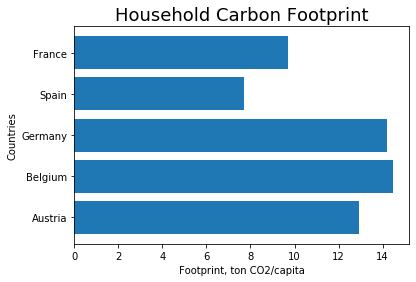

In [18]:
plt.barh(Regnames, CF_NatPC/1e3)
plt.ylabel('Countries')
plt.xlabel('Footprint, ton CO2/capita')
plt.title('Household Carbon Footprint', size=18)

plt.show()

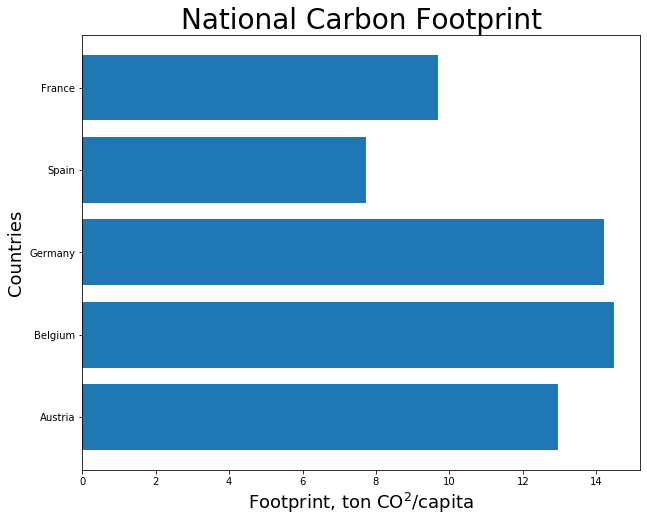

In [21]:
plt.figure(figsize=(10,8))
plt.barh(Regnames, CF_NatPC/1e3)
plt.ylabel('Countries', size=18)
plt.xlabel(r'Footprint, ton CO$_2$/capita', size=18)
plt.title('National Carbon Footprint', size=28)

plt.show()

# Independent Exercise

Calculate other environmental footprints and compare the results. Discuss the difference between these numbers.

In [22]:
print('Script is finished. Terminating logging process and closing all log files.')
Time_End = time.time()
Time_Duration = Time_End - Time_Start

print('End of simulation: ' + time.asctime() + '.')
print('Duration of simulation: %.1f seconds.' % Time_Duration)


Script is finished. Terminating logging process and closing all log files.
End of simulation: Mon Feb  3 14:01:00 2020.
Duration of simulation: 7988.7 seconds.
